Original Dinov2 code does v2.Resize(resize_size,interpolation=interpolation,antialias=True,) followed by v2.CenterCrop(crop_size) with resize_size 256 and cropsize = (224,224)

Original size: 92x183
Resized size: 256x509
Cropped size: 224x224


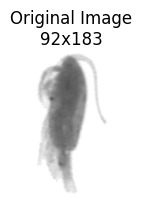

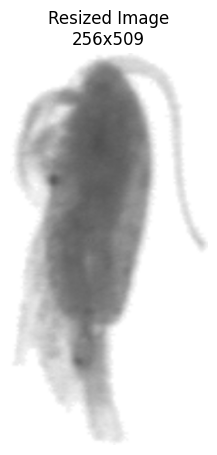

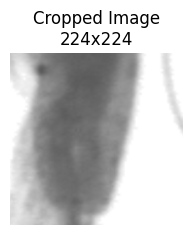

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Resize, CenterCrop


# values from faceboook
resize_size = 256 
crop_size = (224, 224)

image_folder = "imgs"

def visualzie(image_path):
    original_image = Image.open(image_path).convert("RGB")
    print(f"Original size: {original_image.width}x{original_image.height}")



    resize_transform = Resize(resize_size)
    resized_image = resize_transform(original_image)
    print(f"Resized size: {resized_image.width}x{resized_image.height}")

    crop_transform = CenterCrop(crop_size)
    cropped_image = crop_transform(resized_image)
    print(f"Cropped size: {cropped_image.width}x{cropped_image.height}")

    plt.figure(figsize=(original_image.width / 100, original_image.height / 100))
    plt.imshow(original_image)
    plt.title(f"Original Image\n{original_image.width}x{original_image.height}")
    plt.axis("off")
    plt.show()
    #plt.savefig(f'{tag}_original.png')

    plt.figure(figsize=(resized_image.width / 100, resized_image.height / 100))
    plt.imshow(resized_image)
    plt.title(f"Resized Image\n{resized_image.width}x{resized_image.height}")
    plt.axis("off")
    plt.show()
    #plt.savefig(f'{tag}_resized.png')

    plt.figure(figsize=(cropped_image.width / 100, cropped_image.height / 100))
    plt.imshow(cropped_image)
    plt.title(f"Cropped Image\n{cropped_image.width}x{cropped_image.height}")
    plt.axis("off")
    plt.show()
    #plt.savefig(f'{tag}_cropped.png')

# Visualize really bad transform caused by aspect ratio
visualzie(os.path.join(image_folder, "small_img_aspect_ratio.png"))

# Or visualize all images
#for image in os.listdir(image_folder):
#    visualzie(os.path.join(image_folder, image))


We shouldnt use both since we get worst of both worlds: We lose aspect ratio (resize) and crop out parts of original img


In [8]:
def crop(image_path):
    original_image = Image.open(image_path).convert("RGB")

    print(f"Original size: {original_image.width}x{original_image.height}")

    plt.figure(figsize=(original_image.width / 100, original_image.height / 100))
    plt.imshow(original_image)
    plt.title(f"Original Image\n{original_image.width}x{original_image.height}")
    plt.axis("off")
    plt.show()

    crop_transform = CenterCrop(crop_size)
    cropped_image = crop_transform(original_image)
    print(f"Cropped size: {cropped_image.width}x{cropped_image.height}")

    plt.figure(figsize=(cropped_image.width / 100, cropped_image.height / 100))
    plt.imshow(cropped_image)
    plt.title(f"Cropped Image\n{cropped_image.width}x{cropped_image.height}")
    plt.axis("off")
    plt.show()

def resize(image_path):
    original_image = Image.open(image_path).convert("RGB")

    print(f"Original size: {original_image.width}x{original_image.height}")

    plt.figure(figsize=(original_image.width / 100, original_image.height / 100))
    plt.imshow(original_image)
    plt.title(f"Original Image\n{original_image.width}x{original_image.height}")
    plt.axis("off")
    plt.show()

    resize_transform = Resize((224,224)) # fb does only rezise for smaller dim, obv doesnt work for us
    resized_image = resize_transform(original_image)
    print(f"Resized size: {resized_image.width}x{resized_image.height}")

    plt.figure(figsize=(resized_image.width / 100, resized_image.height / 100))
    plt.imshow(resized_image)
    plt.title(f"Resized Image\n{resized_image.width}x{resized_image.height}")
    plt.axis("off")
    plt.show()


Original size: 92x183


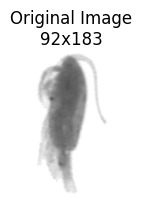

Cropped size: 224x224


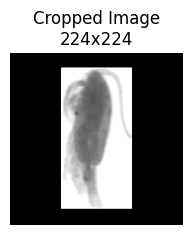

In [9]:
crop(os.path.join(image_folder, "small_img_aspect_ratio.png"))

Original size: 92x183


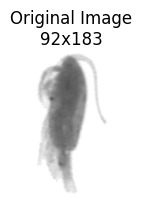

Resized size: 224x224


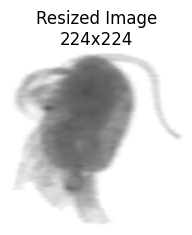

In [10]:
resize(os.path.join(image_folder, "small_img_aspect_ratio.png"))